In [0]:
from google.colab import drive
drive.mount("/content/drive")

In [0]:
# elementary libraries
import pandas as pd
import numpy as np


# for plotting purposes / EDA

import matplotlib.pyplot as plt
import seaborn as sns


# 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ***Exploratory Data Analysis***

In [0]:
data = pd.read_csv("drive/My Drive/Colab Notebooks/DataScience_UM6P/bank-additional-full.csv", sep=";")

In [65]:
data.shape

(41188, 21)

In [66]:
# head of the dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [67]:
# checking for null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are **no missing values**

Therefore we will proceed with the **EDA** and **preprocessing** of the dataset.

In [0]:
# selecting and dropping of the target function:

target = data["y"].map(dict(yes=1, no=0))
data.drop(columns=["y"], inplace = True)

In [69]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


From the **data.describe()**, we can conclude that:

We got **10 continuous variables**:

* age 
* duration 
* campaign 
* pdays 
* previous 
* emp.var.rate 
* cons.price.idx 
* cons.conf.idx 
* euribor3m 
* nr.employed

And **10 categotrical variables**:

* marital 
* job 
* contact 
* education 
* month 
* poutcome 
* housing 
* loan 
* default 
* day_of_week

Note:

*   Although the next variables are numerical: 
    * **emp.var.rate**
    * **cons.price.idx**
    * **cons.conf.idx**
    * **euribor3m**
    * **nr.employed**

*   We will see in their distribution (later on) that these variables only take few number of values, so "maybe" we will represent them for modeling as categorical variables.

*   Also, **pdays** has an annormal std .. we will check this out later on.



Let's see the **distribution** of each **variable**:

In [0]:
catg_vars =  [ "marital", "job", "contact", "education", "month", "poutcome", "housing", "loan", "default", "day_of_week" ]
cont_vars = [ "age", "duration", "campaign", "pdays", "previous", 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' ]

For **categorical variables**:

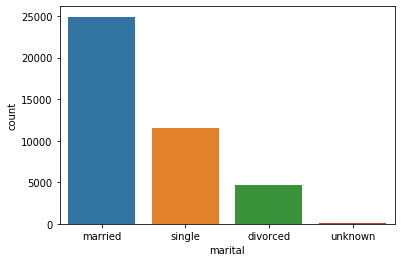

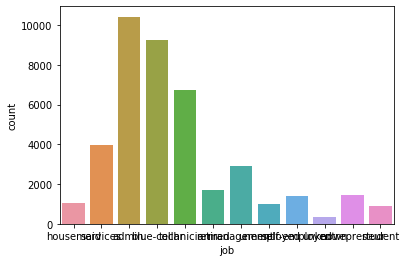

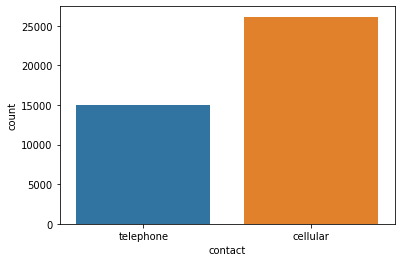

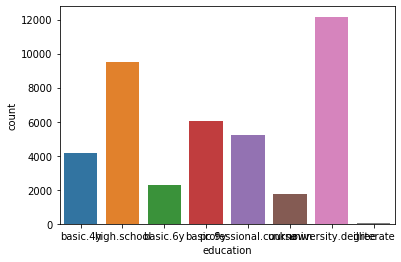

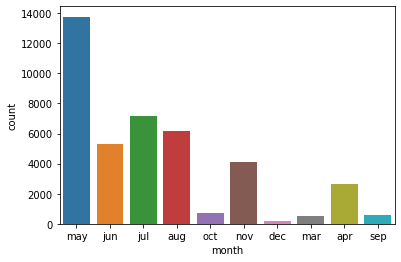

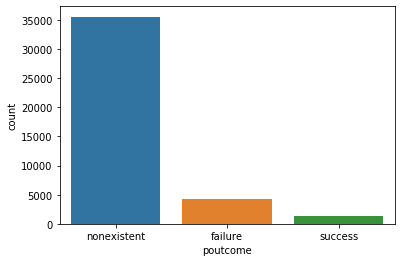

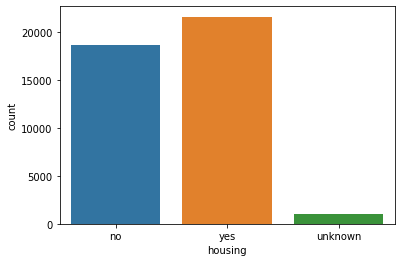

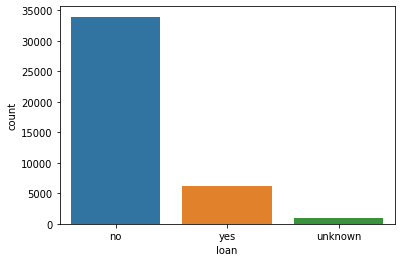

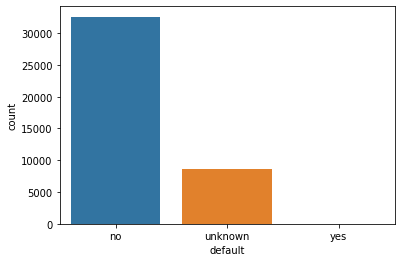

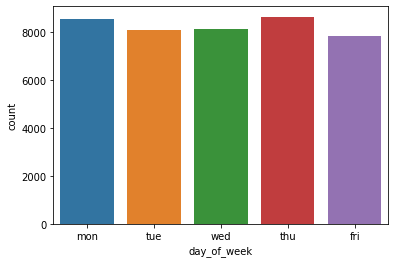

In [71]:
## count plots 
for i in catg_vars :
  plt.figure()
  sns.countplot(x=i, data=data)

Notes:


*   Generally speaking, classes are well balanced, except for some case
*   The extreem cases are:
    * class **unknown** in variable **marital**
    * class **yes** in variable **default**

* Droping these values wouldn't hurt the training.

In [0]:
## droping the outliers (classes with extremely few occurences)

drop1_index = data[data["marital"]== "unknown"].index
drop2_index = data[data["default"]== "yes"].index

data.drop(drop1_index, inplace = True)
data.drop(drop2_index, inplace = True)

target.drop(drop1_index, inplace = True)
target.drop(drop2_index, inplace = True)

Let's investigate on **continuous variables** :

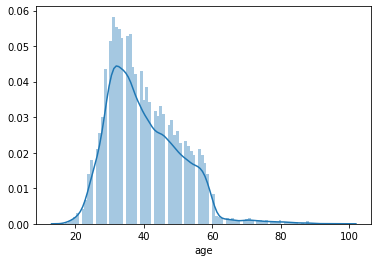

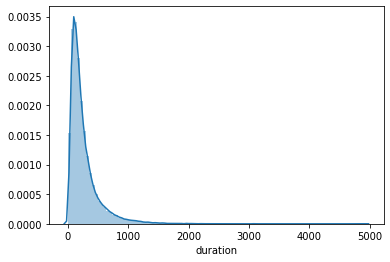

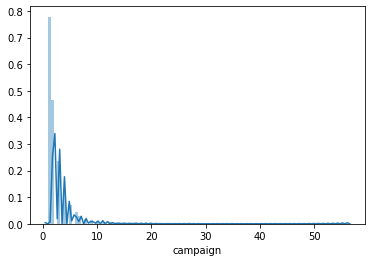

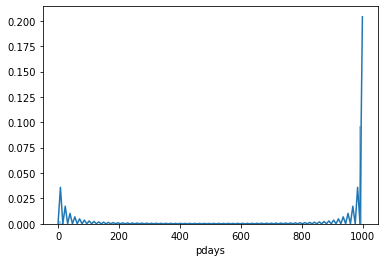

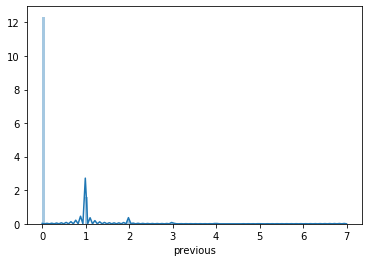

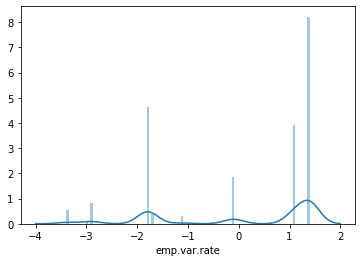

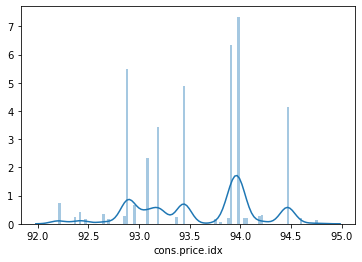

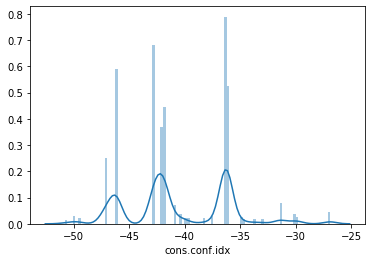

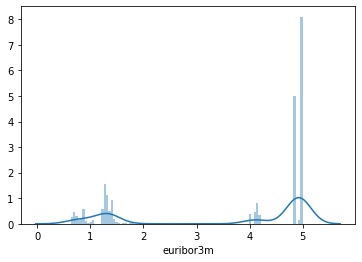

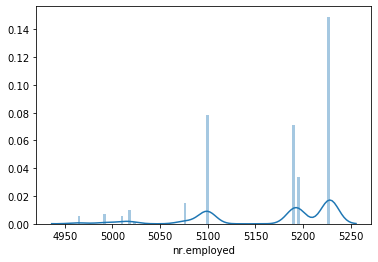

In [73]:
## Distributin of each variable:

for i in cont_vars:
  plt.figure()
  sns.distplot(data[i], bins=100)

Notes:

*   **pdays** distributuion looks suspicious, we will investigate that.

*   And the **last features** take **fixed values** even though they are numerical.

*   Variable are not **on the same scale**, proper **scaling** should be done before modeling.




Let's investigate on the feature **pdays**

In [74]:
data.pdays.value_counts()

999    39595
3        439
6        410
4        117
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        27
1         26
15        24
14        20
8         18
0         15
16        10
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

The value **999** represent a missing value in this case, it''s almost affecting the whole column, we will either drop ip either transfom it to a 1/0 column.

In [0]:
data.drop (columns = ["pdays"], inplace = True)

In [0]:
# let's label encode the features for more analysis:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


# drop "pdays" from cont_vars
cont_vars = [ "age", "duration", "campaign", "previous", 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' ]


d_catg = data[catg_vars].apply(LabelEncoder().fit_transform)
d_cont = data[cont_vars]


d_ = pd.concat([d_catg, d_cont], axis = 1)
d_std = StandardScaler().fit_transform(pd.concat([d_catg, d_cont], axis = 1))

In [77]:
 ## Let's check the variance on the whole dataset:

from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold()

vt.fit_transform(d_)

idx = np.where(vt.variances_ < 0.1)[0]

print("We got ",len(d_.columns[idx])," very low varince columns")

We got  0  very low varince columns


Now Let's see howcontinuous variables behave with regard to the target classes

<Figure size 432x288 with 0 Axes>

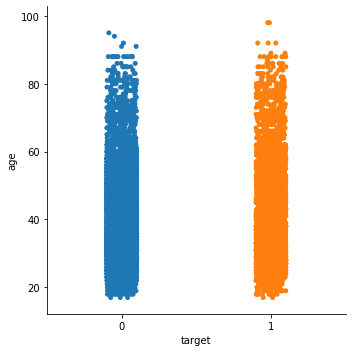

<Figure size 432x288 with 0 Axes>

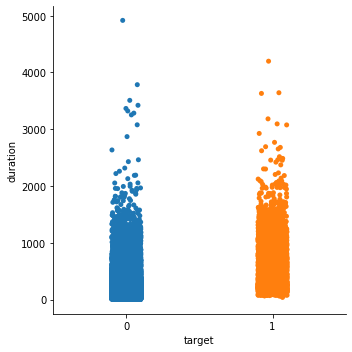

<Figure size 432x288 with 0 Axes>

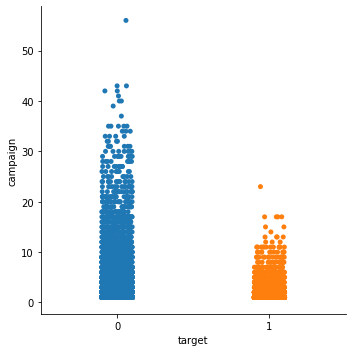

<Figure size 432x288 with 0 Axes>

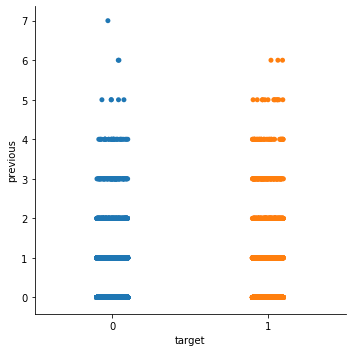

<Figure size 432x288 with 0 Axes>

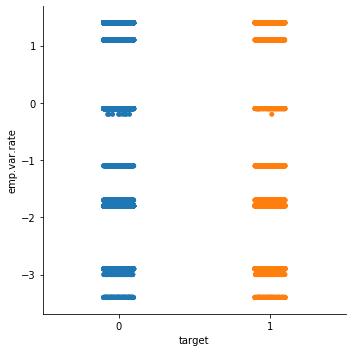

<Figure size 432x288 with 0 Axes>

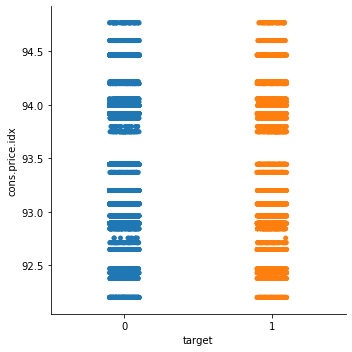

<Figure size 432x288 with 0 Axes>

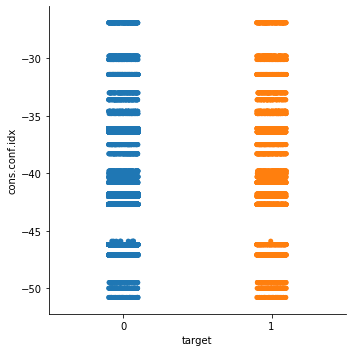

<Figure size 432x288 with 0 Axes>

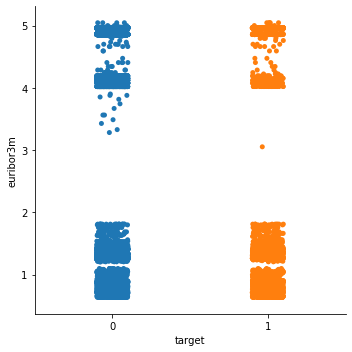

<Figure size 432x288 with 0 Axes>

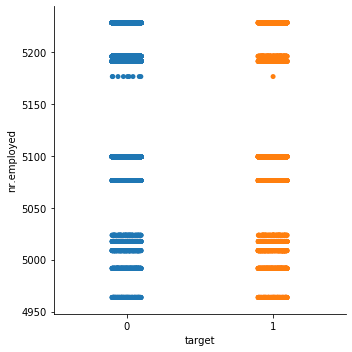

In [78]:
# With regard to the target function

for i in cont_vars :

  df = pd.DataFrame(data = {i : data[i], "target" : target })
  plt.figure()
  sns.catplot(x="target", y=i, data=df)

**Notes:**

*   Each variable is ditributed roughly the same way through the target function.



**Scaling** the continuous variables and **Encoding** categorical variables



In [79]:
## One hot encoding the categorical variables:
catg_data = pd.get_dummies(data[catg_vars])

for i in catg_vars :
  dt = pd.get_dummies(data[i])
  catg_data = pd.concat([catg_data.reset_index().drop(columns = ["index"]), dt.reset_index().drop(columns = ["index"])], axis= 1)

## Scaling cont variables with Standard Scaler
cont_df = pd.DataFrame(data = StandardScaler().fit_transform(data[cont_vars]), columns = cont_vars)

## Concatenating the variables:
final_data = pd.concat([cont_df.reset_index().drop(columns = ["index"]), catg_data.reset_index().drop(columns = ["index"])], axis= 1)

catg_data.shape,  cont_df.shape, final_data.shape, target.shape

((41105, 102), (41105, 9), (41105, 111), (41105,))

# Modeling

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# classifer:

classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Random Forest Classifier': RandomForestClassifier(n_estimators = 100),
               'XGboost' : XGBClassifier(),
               'Logisitic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
              }

def accuracy(df, y):

  trainX, testX, trainY, testY = train_test_split(df, y, train_size=0.8, random_state = 42)

  clf =  RandomForestClassifier(n_estimators = 100)
  clf.fit(trainX, trainY)
  prediction = clf.predict(testX)
  
  return accuracy_score(prediction, testY)
  

def global_prediction(df, y):
  
  trainX, testX, trainY, testY = train_test_split(df, y, train_size=0.8, random_state = 42)

  for name, clf in classifiers.items() :
    clf.fit(trainX, trainY)
    prediction = clf.predict(testX)
    
    print("# Model Name: ", name)
    print("\t > Accuracy: ", accuracy_score(prediction, testY))
    print("\t > F1-Score: ", f1_score(prediction, testY),"\n")

In [81]:
## testing without standard scaler:
print("Accuracy for data without normalization ")

global_prediction(d_, target)

Accuracy for data without normalization 
# Model Name:  Gradient Boosting Classifier
	 > Accuracy:  0.9152171268702104
	 > F1-Score:  0.5833831440526002 

# Model Name:  Adaptive Boosting Classifier
	 > Accuracy:  0.913757450431821
	 > F1-Score:  0.5295288652952886 

# Model Name:  Random Forest Classifier
	 > Accuracy:  0.912784332806228
	 > F1-Score:  0.5744807121661721 

# Model Name:  XGboost
	 > Accuracy:  0.9152171268702104
	 > F1-Score:  0.5757760194765672 

# Model Name:  Logisitic Regression
	 > Accuracy:  0.9095000608198516
	 > F1-Score:  0.5118110236220472 



In [82]:

## testing with standard scaler:
print("Accuracy for data without normalization ")

global_prediction(d_std, target)

Accuracy for data without normalization 
# Model Name:  Gradient Boosting Classifier
	 > Accuracy:  0.9152171268702104
	 > F1-Score:  0.5833831440526002 

# Model Name:  Adaptive Boosting Classifier
	 > Accuracy:  0.913757450431821
	 > F1-Score:  0.5295288652952886 

# Model Name:  Random Forest Classifier
	 > Accuracy:  0.9126626931030288
	 > F1-Score:  0.573127229488704 

# Model Name:  XGboost
	 > Accuracy:  0.9152171268702104
	 > F1-Score:  0.5757760194765672 

# Model Name:  Logisitic Regression
	 > Accuracy:  0.908891862303856
	 > F1-Score:  0.5094957432874918 



In [83]:
## testing with OHE:

old_columns = final_data.columns

final_data.columns = ["feature_"+str(i) for i in range(final_data.shape[1])]

global_prediction(final_data, target)

# Model Name:  Gradient Boosting Classifier
	 > Accuracy:  0.9164335239022017
	 > F1-Score:  0.590339892665474 

# Model Name:  Adaptive Boosting Classifier
	 > Accuracy:  0.9147305680574139
	 > F1-Score:  0.5397242284963887 

# Model Name:  Random Forest Classifier
	 > Accuracy:  0.9107164578518429
	 > F1-Score:  0.5282776349614395 

# Model Name:  XGboost
	 > Accuracy:  0.9154604062766087
	 > F1-Score:  0.5805672902836451 

# Model Name:  Logisitic Regression
	 > Accuracy:  0.9104731784454446
	 > F1-Score:  0.5263835263835264 



In [84]:
## how to move from one columns naming to the other:

print("The name of the feature mapped to age: ",final_data.columns[list(old_columns).index("age")])

The name of the feature mapped to age:  feature_0


# Improvements:

We will in this section try to improve the accuracy using:

*   **Fine tunning (Grid Search)**
*   **Feature engineering**
*   **Feature selection**
*   **Stacking**
*   **Augmenting the class 0**



**Fine tunning**


*   Here we will pick the **Random Forest** Model and fine tune it with:
    * **grid search**
    * **cross validation** 




In [0]:
from sklearn.model_selection import GridSearchCV

In [86]:
params = {'max_depth': [10, 15, 20],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 4],
          'n_estimators': [200, 250, 300] }

clf_CV = GridSearchCV(RandomForestClassifier(), param_grid = params)

clf_CV.fit(trainX, trainY)

pred_cv = clf_CV.predict(testX)

print("\t > Accuracy: ", accuracy_score(pred_cv, testY))
print("\t > F1-Score: ", f1_score(pred_cv, testY),"\n")

print("Best Estimator: ", clf_CV.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


	 > Accuracy:  0.9115679357742367
	 > F1-Score:  0.5413249211356468 

Best Estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


**Feature Engineering & Features Selction:**



**Features Engineering:**

*   Dropping high variance variables
*   Dropping highly correlated variables
*   Categorize numerical features with fixed number of values

**Droping highly correlated features:**

In [0]:
# Create correlation matrix
corr_matrix = final_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
thresh = np.linspace(0.8, 0.98, 10)
scores = []
for i in thresh :
  to_drop = [column for column in upper.columns if any(upper[column] > i)]
  new_data = final_data.drop(columns = to_drop, axis=1)
  scores += [ accuracy(new_data, target) ]

plt.scatter(thresh, scores)
plt.xlabel("Correlation threshold")
plt.ylabel("Related score")
plt.show()

We will take **0.9** as a threshold for correlated columns
>> This way, **49 columns** will be dropped. 

In [0]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.92)]
final_data.drop(columns = to_drop, axis=1, inplace = True)

**Dropping very low-variance columns :**




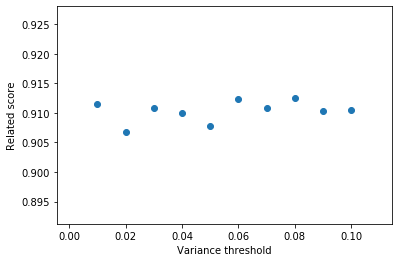

In [92]:
vt = VarianceThreshold()
vt.fit_transform(final_data)

threshold_list = np.linspace(0.01,0.1,10)
scores = []

for t in threshold_list :
  idx = np.where(vt.variances_ < t)[0]
  newData = final_data.drop(columns = final_data.columns[idx])
  scores += [accuracy(newData, target)]

plt.scatter(threshold_list, scores)
plt.xlabel("Variance threshold")
plt.ylabel("Related score")
plt.show()

We will use **0.04** as threshold for Variance. 
>> This way, **23 columns** will be dropped.

In [59]:
idx = np.where(vt.variances_ < t)[0]
final_data.drop(columns = final_data.columns[idx], inplace=True)

final_data.shape, len(idx)

((41105, 31), 23)

**Feature Selection:**

We will see in this section how the accuracy changes when we select few of the most important features.

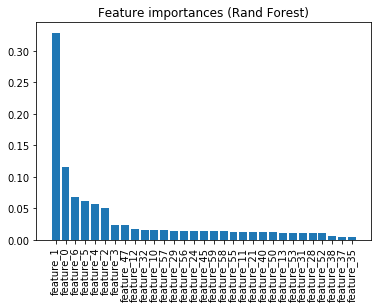

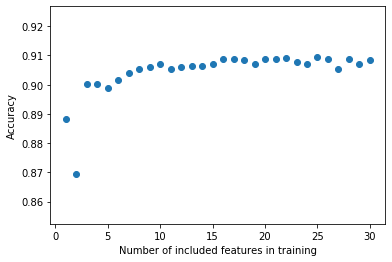

In [61]:
trainX, testX, trainY, testY = train_test_split(final_data, target, train_size=0.8, random_state = 42)

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(trainX, trainY)

sorted_features = sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), final_data.columns), reverse=True)

columns_taken_into_consideration = []

importance_df =  pd.DataFrame(sorted_features, columns = ["score", "feature"])

x_pos = np.arange(0, len(importance_df))

plt.bar(x_pos, importance_df['score'])
plt.xticks(x_pos, importance_df['feature'])
plt.xticks(rotation=90)
plt.title('Feature importances (Rand Forest)')

plt.show()

accuracy_by_feature_importance = []

for i in range(30):
  columns_taken_into_consideration += [sorted_features[i][1]]
  
  newTrain_data = pd.DataFrame(data = trainX, columns = final_data.columns)[columns_taken_into_consideration]
  newTest_data =  pd.DataFrame(data = testX, columns = final_data.columns)[columns_taken_into_consideration]

  clf = RandomForestClassifier(n_estimators=100)
  clf.fit(newTrain_data, trainY)
  pred = clf.predict(newTest_data)
  current_score = accuracy_score(pred, testY)
  accuracy_by_feature_importance += [current_score]


plt.scatter(range(1,31), accuracy_by_feature_importance)
plt.xlabel("Number of included features in training")
plt.ylabel("Accuracy")
plt.show()

*  As we can see from the final plot, using **only 10 of the most features** gives almost same result as using the whole data.

* Therefore, We can only use the most important 10 features for later use (stacking for example) .. so we can include variety of classification models and have fast results (for instance try to use SVM who doesis very computationnaly heavy)




**Stacking**


*   We will stack these three models and see if we can improve the performances:
    * 'Gradient Boosting Classifier'
    * 'Adaptive Boosting Classifier'
    * 'Random Forest Classifier'
    * 'XGboost'
    * 'Logisitic Regression'
    * 'SVM'

* We will retrain the models while using only 8 of the most important features obtained in the feature selection phase (using only 8 with makes us add more classifier in lesser time)





In [97]:
most_important_features = [i[1] for i in most_important_features ]
most_important_features

['feature_1',
 'feature_0',
 'feature_6',
 'feature_5',
 'feature_4',
 'feature_2',
 'feature_3',
 'feature_47',
 'feature_12',
 'feature_32']

In [98]:
##  sub select most important features and retrain data .... 

classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Random Forest Classifier': RandomForestClassifier(n_estimators = 100),
               'XGboost' : XGBClassifier(),
               'Logisitic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
               'SVM': SVC(gamma="auto", probability = True)
              }

newTrain_ = pd.DataFrame(data = trainX, columns = final_data.columns)[most_important_features]
newTest_ =  pd.DataFrame(data = testX, columns = final_data.columns)[most_important_features]


print(newTrain_.shape, newTest_.shape)
stacking_train_ = {}
stacking_test_ = {}

for name, clf in classifiers.items() :
  clf.fit(newTrain_, trainY)
  prediction = clf.predict(newTest_)
  
  # We will use predict proba .. it will give more variety to the results of each model, and hopefully less correlation
  
  stacking_train_[name] = clf.predict_proba(newTrain_)[:,0]
  stacking_test_[name] = clf.predict_proba(newTest_)[:,0]


stacking_train_Dataset =  pd.DataFrame(data = stacking_train_)
stacking_test_Dataset = pd.DataFrame(data = stacking_test_)

(32884, 10) (8221, 10)


In [99]:
for name, clf in classifiers.items() :
  clf.fit(stacking_train_Dataset, trainY)

  stackingPrediction = clf.predict(stacking_test_Dataset) 

  print("# Model Name: ", name)
  print("\t > Accuracy: ", accuracy_score(stackingPrediction, testY))
  print("\t > F1-Score: ", f1_score(stackingPrediction, testY),"\n\n")

# Model Name:  Gradient Boosting Classifier
	 > Accuracy:  0.9067023476462718
	 > F1-Score:  0.5624643468339988 


# Model Name:  Adaptive Boosting Classifier
	 > Accuracy:  0.9045128329886875
	 > F1-Score:  0.5527065527065526 


# Model Name:  Random Forest Classifier
	 > Accuracy:  0.9039046344726919
	 > F1-Score:  0.5601336302895323 


# Model Name:  XGboost
	 > Accuracy:  0.9035397153630945
	 > F1-Score:  0.5645249862712794 


# Model Name:  Logisitic Regression
	 > Accuracy:  0.9048777520982849
	 > F1-Score:  0.5566893424036281 


# Model Name:  SVM
	 > Accuracy:  0.9034180756598954
	 > F1-Score:  0.5457665903890161 




All models are behaving well, since columns (past predictions of models) are highly correlated (they gave in modeling almost the same results) the results of stacking are almost identical.